# Project Title: The Analysis of Hotel Booking Demands


## By

- **Mashael Asiri**


---


# Hotel Booking Dataset Explanation
The dataset have been used from https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data

**The dataset consists of 32 columns, each representing different aspects of hotel bookings. Here's a brief description of each column:**

- **hotel:** Type of hotel (Resort Hotel or City Hotel).
- **is_canceled:** Value indicating if the booking was canceled (1) or not (0).
- **lead_time:** Number of days that elapsed between the booking date and the arrival date.
- **arrival_date_year:** Year of arrival date.
- **arrival_date_month:** Month of arrival date.
- **arrival_date_week_number:** Week number of the arrival date.
- **arrival_date_day_of_month:** Day of the month of the arrival date.
- **stays_in_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.
- **stays_in_week_nights:** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.
- **adults:** Number of adults.
- **children:** Number of children.
- **babies:** Number of babies.
- **meal:** Type of meal booked. Categories are presented in standard hospitality 
- **meal packages:** Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch, and dinner).
country: Country of origin. ISO 3155–3:2013 format.
- **market_segment:** Market segment designation. In categories, it describes the origin of the booking.
- **distribution_channel:** Booking distribution channel. The means through which the booking was made.
- **is_repeated_guest:** Value indicating if the booking name was from a repeated guest (1) or not (0).
- **previous_cancellations:** Number of previous bookings that were canceled by the customer prior to the current booking.
- **previous_bookings_not_canceled:** Number of previous bookings not canceled by the customer prior to the current booking.
- **reserved_room_type:** Code of room type reserved. Room codes are presented as character and not standardized among different hotels.
- **assigned_room_type:** Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g., overbooking) or by customer request.
- **booking_changes:** Number of changes/amendments made to the booking from the moment the booking was entered into the hotel system until the moment of check-in or cancellation.
- **deposit_type:** Indication of if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- **agent:** ID of the travel agency that made the booking.
- **company:** ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.
- **days_in_waiting_list:** Number of days the booking was in the waiting list before it was confirmed to the customer.
- **customer_type:** Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking.
- **adr:** Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.
- **required_car_parking_spaces:** Number of car parking spaces required by the customer.
- **total_of_special_requests:** Number of special requests made by the customer (e.g., twin bed or high floor).
- **reservation_status:** Last status of the reservation, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked out but the invoice was not yet issued; No-Show – customer did not check-in and did inform the hotel of the reason why.
- **reservation_status_date:** Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when the booking was canceled or when the customer checked out of the hotel.



## Import Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

## Load Dataset

In [23]:
df = pd.read_csv('hotel_bookings.csv')


## Exploratory Data Analysis (EDA)

### Exploring your data / Diagnosis phase

When you get a new DataFrame to work with, the first thing you need to do is explore it and see what it contains. There are several useful methods and attributes for this.

- .head() returns the first few rows (the “head” of the DataFrame).
- .tail() returns the first few rows (the “tail” of the DataFrame).
- .info() shows information on each of the columns, such as the data type and number of missing values.
- .shape returns the number of rows and columns of the DataFrame.
- .columns: An index of columns: the column names.


In [24]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [25]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [26]:
df.shape

(119390, 32)



### Data Cleaning

- **Checking for Missing Values**

Missing data can affect your analysis and models. Determine if any columns have missing values and decide how to handle them.

In [27]:
 # Count of missing values in each column (Hajer)
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

- **Drop Columns and Rows with  Missing Values**

In [28]:
# Remove columns with more than 50% missing values
threshold = len(df) / 2
df = df.dropna(thresh=threshold, axis=1)

# Fill missing values: numerical columns with the median, categorical with the mode
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical column
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:  # Numerical column
        df[column].fillna(df[column].median(), inplace=True)

# Verify the cleaning (optional)
print(df.isnull().sum())  # Should show 0 for all columns


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

- **Display the first few rows of the cleaned datasets**

In [29]:
# Display the first few rows of the cleaned dataset
print(df.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0        

- **Check and Remove duplicated Data**

here the nature of dataset required duplication on the data. so, no data will be removed

In [30]:
# check duplicated rows
df.duplicated()
# remove duplicated rows
# df.drop_duplicates(inplace=True)

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [31]:
df.shape

(119390, 31)

- **change the columns data type**

In [42]:
df['children'] = df['children'].astype('int64')

- **check the typo error in objects**

Check Unique Values for df column to know whether column type is correct or not

In [32]:
for i in df.columns:
    x = df[i].value_counts()
    print("Column name ",i," has different values of:",len(x))

Column name  hotel  has different values of: 2
Column name  is_canceled  has different values of: 2
Column name  lead_time  has different values of: 479
Column name  arrival_date_year  has different values of: 3
Column name  arrival_date_month  has different values of: 12
Column name  arrival_date_week_number  has different values of: 53
Column name  arrival_date_day_of_month  has different values of: 31
Column name  stays_in_weekend_nights  has different values of: 17
Column name  stays_in_week_nights  has different values of: 35
Column name  adults  has different values of: 14
Column name  children  has different values of: 5
Column name  babies  has different values of: 5
Column name  meal  has different values of: 5
Column name  country  has different values of: 177
Column name  market_segment  has different values of: 8
Column name  distribution_channel  has different values of: 5
Column name  is_repeated_guest  has different values of: 2
Column name  previous_cancellations  has d

In [35]:
#check the arrival_date_month column values if there is entering error
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [36]:
#check the meal column values if there is entering error
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [38]:
#check the meal column values if there is entering error
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

### Data Exploration

- **Explore the Descriptive Statistics**

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

In [34]:
 # Summary statistics for numerical columns (Hajer)
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,76.744392,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,105.904658,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


In [71]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Assuming 'df' is your DataFrame and 'hotel' is the name of the column to be encoded
df['hotel_encoded'] = label_encoder.fit_transform(df['hotel'])

# Display the first few rows to verify the encoding
print(df[['hotel', 'hotel_encoded']].head())

          hotel  hotel_encoded
0  Resort Hotel              1
1  Resort Hotel              1
2  Resort Hotel              1
3  Resort Hotel              1
4  Resort Hotel              1


## Data Transformation

- **Normalization:** Scale numeric data to a standard range (e.g., 0 to 1) to ensure that no variable dominates due to its scale.
- **Standardization:** Transform data to have a mean of 0 and a standard deviation of 1, which is especially useful for algorithms that are sensitive to the scale of data.
- **Encoding Categorical** Variables: Convert categorical variables into a form that can be provided to ML algorithms. Techniques include label encoding, one-hot encoding, and binary encoding

In [82]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# Assuming 'df' is your DataFrame

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']

# Make sure all specified categorical columns exist in the DataFrame
assert all(col in df.columns for col in categorical_cols), "One or more categorical columns are not in the DataFrame"

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply transformations to the dataset
# Replace 'df' with the subset of the DataFrame if needed
data_preprocessed = preprocessor.fit_transform(df)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_category,hotel_encoded
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,181-365,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,>365,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,14.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0-30,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0-30,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,0-30,1


# The Analysis and Visualization 

## Booking Ratio Between Hotel Types

**The pie chart shows the proportion of bookings between Resort Hotels and City Hotels.**

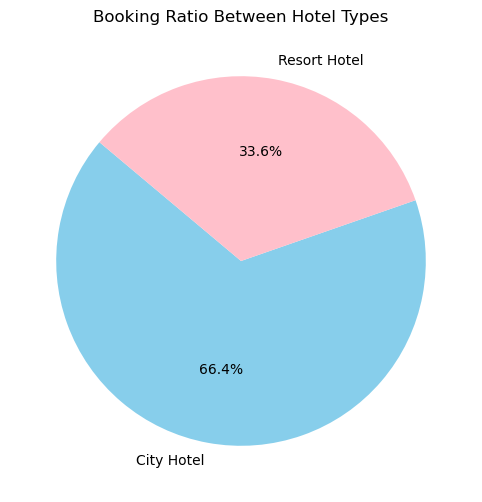

In [48]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and the 'hotel' column contains the hotel types
# Calculate the booking ratio
booking_ratio = df['hotel'].value_counts(normalize=True)

# Generate the pie chart
plt.figure(figsize=(8, 6))
plt.pie(booking_ratio, labels=booking_ratio.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'pink'])
plt.title('Booking Ratio Between Hotel Types')
plt.show()

## Cancellation Rate by Lead Time Category

**This bar chart indicates the relationship between lead times and cancellation rates. Longer lead times may have different impacts on the likelihood of a booking being canceled, showing whether planning far ahead correlates with a higher chance of cancellation..**

/var/folders/tl/5427rtd52qn61143zy9xb62h0000gp/T/ipykernel_6209/3943230610.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lead_time_cancellation_rate = df.groupby('lead_time_category')['is_canceled'].mean()


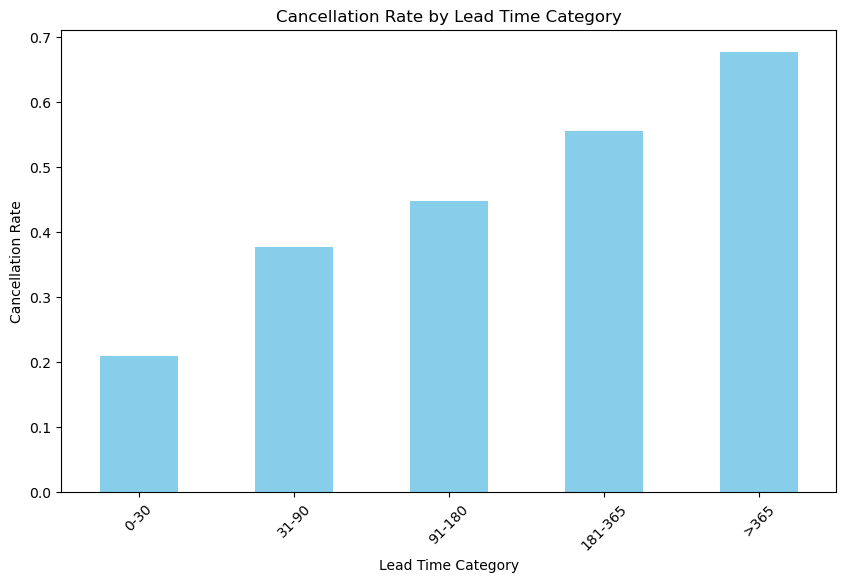

In [53]:


# Assuming 'df' is your DataFrame already loaded with hotel booking data
# Categorizing lead time into bins for more manageable analysis
df['lead_time_category'] = pd.cut(df['lead_time'],
                                    bins=[0, 30, 90, 180, 365, max(df['lead_time'])],
                                    labels=['0-30', '31-90', '91-180', '181-365', '>365'])

# Calculating cancellation rate by lead time category
lead_time_cancellation_rate = df.groupby('lead_time_category')['is_canceled'].mean()

# Plotting the cancellation rate by lead time category
plt.figure(figsize=(10, 6))
lead_time_cancellation_rate.plot(kind='bar', color='skyblue')
plt.title('Cancellation Rate by Lead Time Category')
plt.xlabel('Lead Time Category')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)  # Improve label readability
plt.show()

## Monthly Bookings for Each Hotel Type

**The line plot displays the seasonality of hotel bookings, highlighting the busiest months for both types of hotels. This graph reveals how booking volumes change throughout the year, indicating peak and off-peak seasons.**

/var/folders/tl/5427rtd52qn61143zy9xb62h0000gp/T/ipykernel_6209/4045643030.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_bookings = df.groupby(['hotel', 'arrival_date_month']).size().unstack()


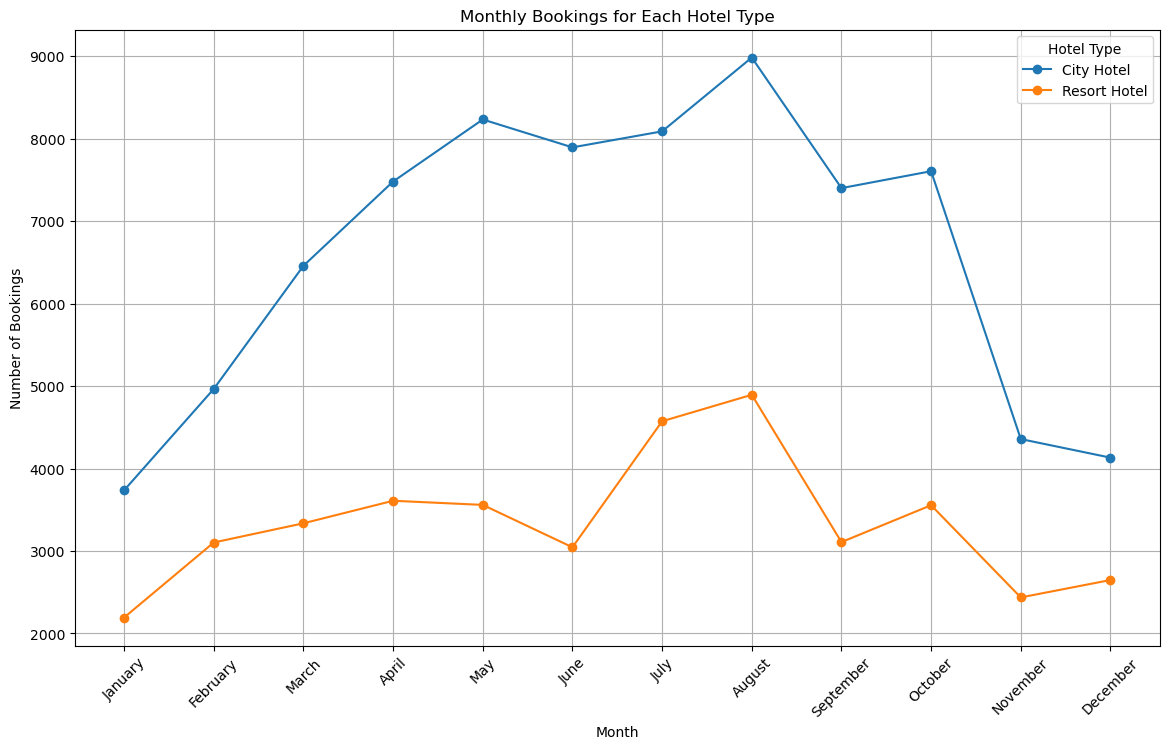

In [54]:

# Ensure 'arrival_date_month' is in the correct order for plotting
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], 
                                            categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                                        'July', 'August', 'September', 'October', 'November', 'December'], 
                                            ordered=True)

# Group by hotel type and arrival date month, then count the number of bookings
monthly_bookings = df.groupby(['hotel', 'arrival_date_month']).size().unstack()

# Plotting
plt.figure(figsize=(14, 8))
for hotel in monthly_bookings.index:
    plt.plot(monthly_bookings.columns, monthly_bookings.loc[hotel], marker='o', label=hotel)

plt.title('Monthly Bookings for Each Hotel Type')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title='Hotel Type')
plt.grid(True)
plt.show()

## Which are the most common countries of origin for hotel guests?

**The bar plot above shows the top 10 countries of origin for hotel guests, providing a clear view of where the majority of guests come from.**
- PRT (Portugal): 48,590 bookings
- GBR (United Kingdom): 12,129 bookings
- FRA (France): 10,415 bookings
- ESP (Spain): 8,568 bookings
- DEU (Germany): 7,287 bookings
- ITA (Italy): 3,766 bookings
- IRL (Ireland): 3,375 bookings
- BEL (Belgium): 2,342 bookings
- BRA (Brazil): 2,224 bookings
- NLD (Netherlands): 2,104 bookings**

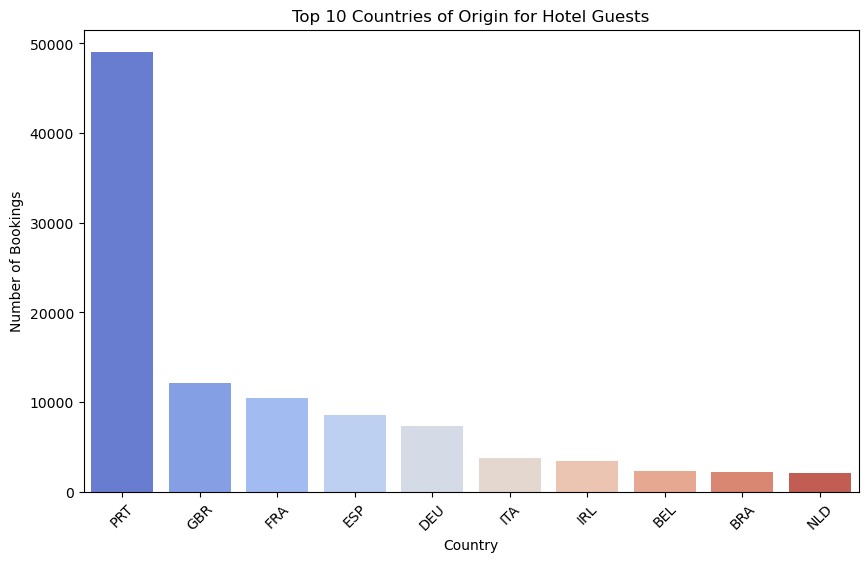

In [55]:
top_countries = df['country'].value_counts().head(10)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries, palette='coolwarm')
plt.title('Top 10 Countries of Origin for Hotel Guests')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()